In [ ]:
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_2samp

# --- 1. Data Generation ---
# Set seed for reproducibility
np.random.seed(42)

# Sample 1: 50 points from a Normal Distribution (Population 1)
# Mean = 10, Standard Deviation = 2
n = 50
sample_A = np.random.normal(loc=10, scale=2, size=n)

# Sample 2: 50 points from a Normal Distribution (Population 2)
# Mean = 14, Standard Deviation = 2
m = 50
sample_B = np.random.normal(loc=5, scale=2, size=m)

print(f"Sample A (n={n}) Mean: {np.mean(sample_A):.2f}")
print(f"Sample B (m={m}) Mean: {np.mean(sample_B):.2f}\n")


# --- 2. Run Wald-Wolfowitz Test ---

# The runstest_2samp function performs the Wald-Wolfowitz two-sample runs test.
# It returns the Z-statistic (asymptotically normal) and the p-value.
# The correction=True setting applies a continuity correction for n < 50, but is
# often included in general large sample approximations as well.
z_stat, p_value = runstest_2samp(x=sample_A, y=sample_B, correction=True)


# --- 3. Display and Interpret Results ---

# The test is inherently one-tailed (rejecting H0 only for too few runs).
# The p-value returned by statsmodels is usually for the two-sided test,
# but for testing against clustering, we use the one-tailed interpretation.
# Since clustering (H_A) implies a Z-statistic on the lower tail (negative),
# we check the p-value corresponding to the lower tail.
# P(R <= R_observed) = P(Z <= Z_observed)
p_one_sided = p_value / 2

# Significance level
alpha = 0.05

print("--- Wald-Wolfowitz Runs Test Results ---")
print(f"Observed Z-Statistic: {z_stat:.4f}")
print(f"Two-Sided P-value:    {p_value:.4f}")
print(f"One-Sided P-value:    {p_one_sided:.4f}")

print("\n--- Conclusion (One-Tailed Test, $\\alpha=0.05$) ---")

if p_one_sided < alpha:
    print(f"Since the one-sided P-value ({p_one_sided:.4f}) is less than {alpha}, we REJECT H0.")
    print("Conclusion: The two samples do not appear to be drawn from the same distribution (evidence of clustering).")
else:
    print(f"Since the one-sided P-value ({p_one_sided:.4f}) is greater than {alpha}, we FAIL TO REJECT H0.")
    print("Conclusion: There is insufficient evidence to conclude that the two samples are from different distributions.")

Sample A (n=50) Mean: 9.55
Sample B (m=50) Mean: 5.04

--- Wald-Wolfowitz Runs Test Results ---
Observed Z-Statistic: -7.4377
Two-Sided P-value:    0.0000
One-Sided P-value:    0.0000

--- Conclusion (One-Tailed Test, $\alpha=0.05$) ---
Since the one-sided P-value (0.0000) is less than 0.05, we REJECT H0.
Conclusion: The two samples do not appear to be drawn from the same distribution (evidence of clustering).


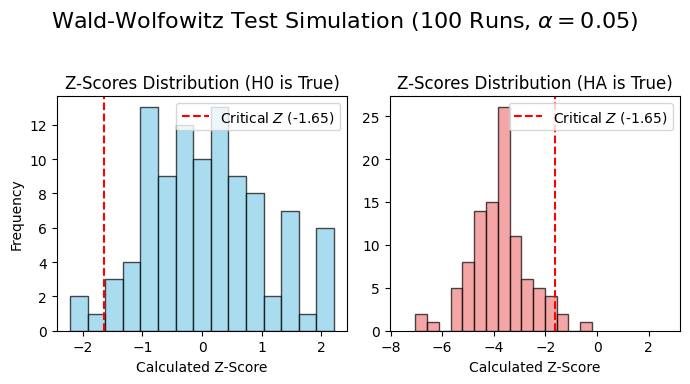


--- Simulation Summary ---
H0 True (Same Dist.): 3/100 rejections (3.00% Type I Error)
HA True (Different Dist.): 96/100 rejections (96.00% Power)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_2samp

# --- Configuration ---
n_iterations = 100  # Number of simulation runs
n_sample = 50       # Sample size for each group (n1=50, n2=50)
alpha = 0.05        # Significance level
critical_z = -1.645 # One-tailed critical Z-value for alpha=0.05

# Lists to store results
z_scores_h0 = []
p_values_h0 = []
z_scores_ha = []
p_values_ha = []

# --- Simulation Loop ---
for _ in range(n_iterations):
    # --- Scenario 1: H0 is True (Same Distribution) ---
    # Both samples from N(mean=10, std=2)
    sample_A_h0 = np.random.normal(loc=10, scale=2, size=n_sample)
    sample_B_h0 = np.random.normal(loc=10, scale=2, size=n_sample)

    z_h0, p_h0 = runstest_2samp(x=sample_A_h0, y=sample_B_h0, correction=True)
    z_scores_h0.append(z_h0)
    # Use one-sided p-value for hypothesis testing
    p_values_h0.append(p_h0 / 2)


    # --- Scenario 2: HA is True (Different Distributions) ---
    # Sample A from N(mean=10, std=2)
    # Sample B from N(mean=14, std=2) -> A clear shift in location
    sample_A_ha = np.random.normal(loc=10, scale=2, size=n_sample)
    sample_B_ha = np.random.normal(loc=13, scale=2, size=n_sample)

    z_ha, p_ha = runstest_2samp(x=sample_A_ha, y=sample_B_ha, correction=True)
    z_scores_ha.append(z_ha)
    p_values_ha.append(p_ha / 2)



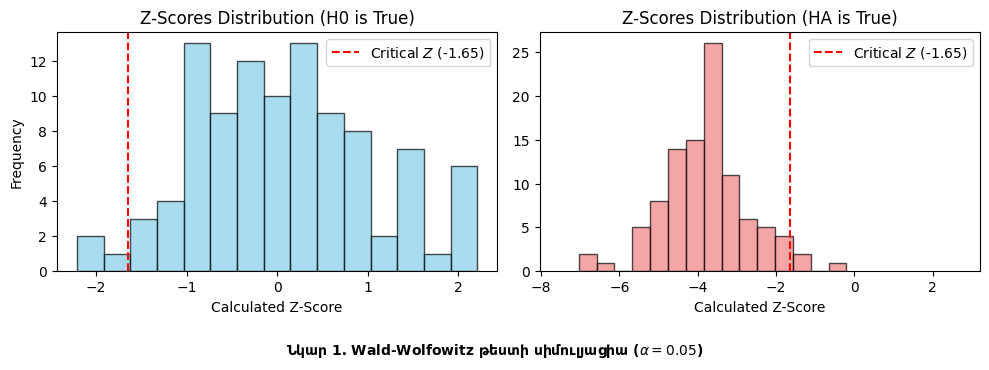


--- Simulation Summary ---
H0 True (Same Dist.): 3/100 rejections (3.00% Type I Error)
HA True (Different Dist.): 96/100 rejections (96.00% Power)


In [12]:

# --- 3. Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Նկար 1․ Wald-Wolfowitz թեստի սիմուլյացիա ($\\alpha=0.05$)", fontsize=10, fontweight='bold', y=-0.001)

# --- Z-Score Histogram (H0 True) ---
axes[0].hist(z_scores_h0, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(critical_z, color='red', linestyle='--', label=f'Critical $Z$ ({critical_z:.2f})')
axes[0].set_title('Z-Scores Distribution (H0 is True)')
axes[0].set_xlabel('Calculated Z-Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()
# --- Z-Score Histogram (HA True) ---
axes[1].hist(z_scores_ha, bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(critical_z, color='red', linestyle='--', label=f'Critical $Z$ ({critical_z:.2f})')
axes[1].set_title('Z-Scores Distribution (HA is True)')
axes[1].set_xlabel('Calculated Z-Score')
axes[1].set_xlim(min(z_scores_ha) - 1, max(z_scores_h0) + 1) # Ensure same scale for comparison
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Summary Statistics ---
rejection_h0 = np.sum(np.array(z_scores_h0) < critical_z)
rejection_ha = np.sum(np.array(z_scores_ha) < critical_z)

print("\n--- Simulation Summary ---")
print(f"H0 True (Same Dist.): {rejection_h0}/{n_iterations} rejections ({rejection_h0/n_iterations:.2%} Type I Error)")
print(f"HA True (Different Dist.): {rejection_ha}/{n_iterations} rejections ({rejection_ha/n_iterations:.2%} Power)")